## ***Importing Necessary Libraries and the provided dataset***

In [25]:
#Importing All the necassary libraries
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Importing the dataset

df=pd.read_csv("/content/Iris.csv")

In [27]:
#Displaying a sample of the imported Iris Dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# ***Data Visualisation and preprocessing***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


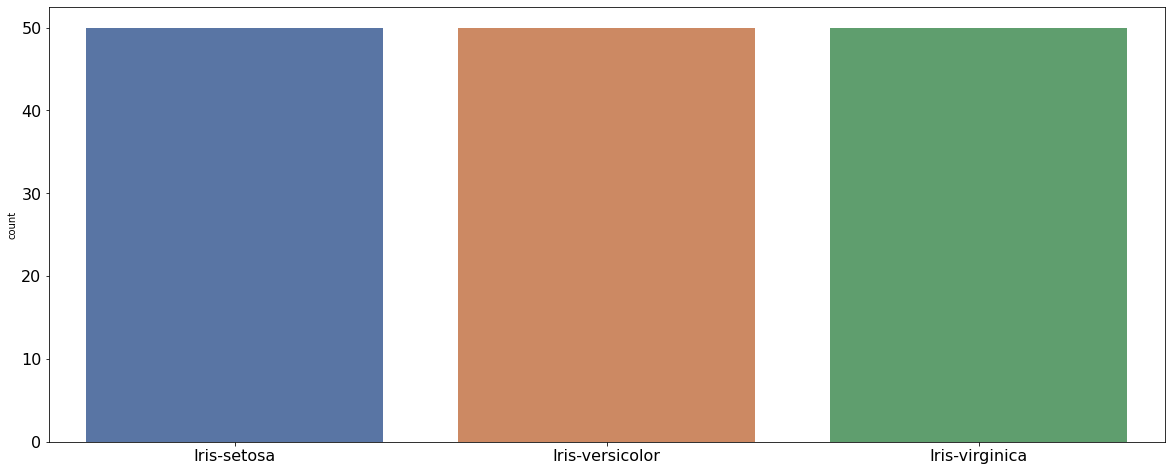

In [28]:
#Class distribution
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = sns.countplot(df['Species'].values, palette='deep')
ax.tick_params(labelsize=16)

In [29]:
#Dropping Unwanted Columns
df.drop('Id', inplace=True, axis=1)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


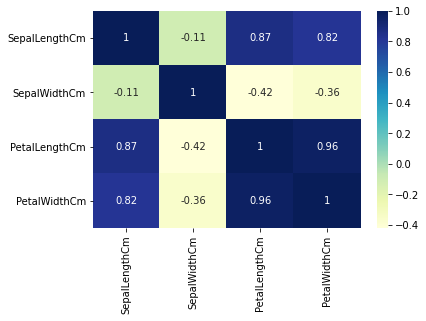

In [30]:
#Visualising the corelation
print(df.corr())

#Heatmap
Heatmap = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#Ploting
plt.show()

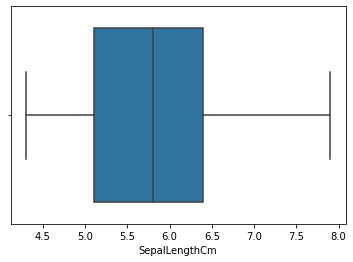

In [31]:
#Checking For Outliers

#SepalLengthCm
ax = sns.boxplot(x=df["SepalLengthCm"])

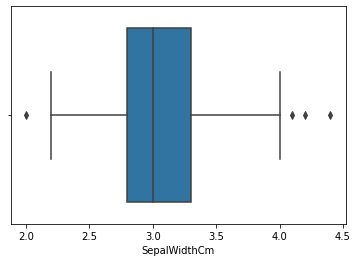

In [32]:
#SepalWidthCm 
ax = sns.boxplot(x=df["SepalWidthCm"])

In [35]:
#Finding the First and Third Quartile
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)

#Interquartile range
iqr = q3-q1

#limits
lower_limit  = q1-1.5*iqr
upper_limit  = q3+1.5*iqr
    
   
df = df.loc[(df['SepalWidthCm'] > lower_limit) & (df['SepalWidthCm'] < upper_limit)]

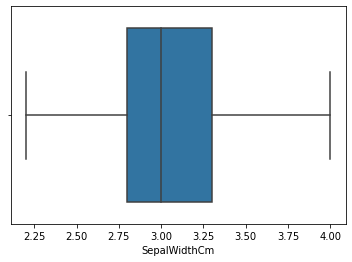

In [36]:
#After Removing Outliers
ax = sns.boxplot(x=df["SepalWidthCm"])

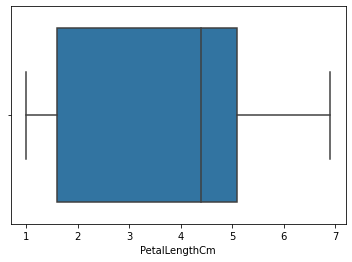

In [37]:
#PetalLengthCm
ax = sns.boxplot(x=df["PetalLengthCm"])

In [38]:
#The input data is to be classifies into three output classes
#Labelling Each Output Class

df=df.replace(to_replace="Iris-setosa",value=0)

df=df.replace(to_replace="Iris-versicolor",value=1)

df=df.replace(to_replace="Iris-virginica",value=2)

In [39]:
#Splitting the dataset into test and train for teesting and training respectively
from sklearn.model_selection import train_test_split

x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.3,random_state=0)

In [40]:
from sklearn.tree import DecisionTreeClassifier

#Setting the random state as zero for consitent results
classifier=DecisionTreeClassifier(random_state=0)

#Fitting the classifier on to the data
classifier.fit(x_train,y_train)

#Feeding data on the trained model
predictions=classifier.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 0 15  1]
 [ 0  0 12]]


In [42]:
from sklearn.metrics import classification_report

#Perfomance Metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



# ***Visualizing the Decision Tree Classifier***


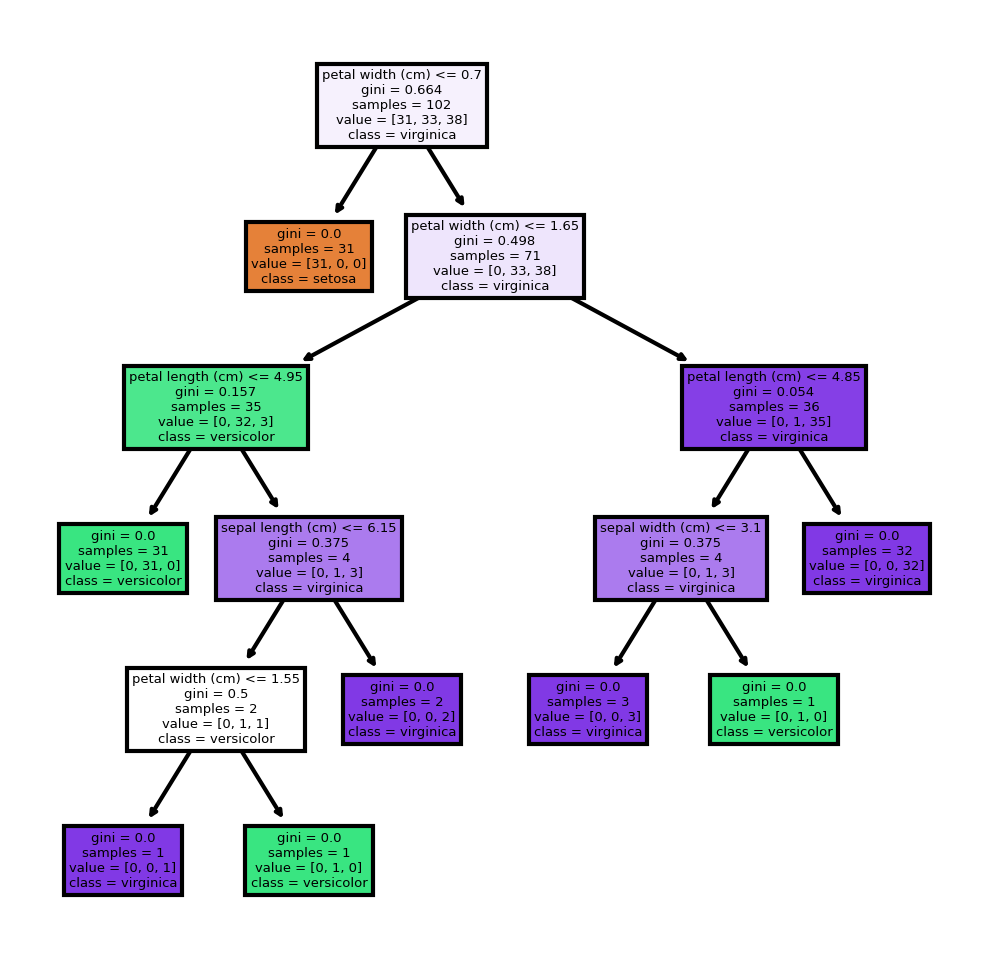

In [48]:
#Visualising the Decision Tree

#Importing the necassary libraries for visuliation
from sklearn import tree


fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = fn, 
               class_names=cn,
               filled = True);